# Importation des packages

In [1]:
# Importer les modules nécessaires
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Chargement des données

Les données concernent des campagnes de marketing direct (appels téléphoniques) d'une institution bancaire portugaise.

In [2]:
bankdata=pd.read_csv("bank_cleaned.csv",sep=",",index_col=0)

In [3]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


## Description de la base de données "bank_cleaned.csv"

La base de données "bank_cleaned.csv" contient des données sur les campagnes de marketing direct (appels téléphoniques) d'une institution bancaire portugaise. Les données ont été nettoyées et préparées pour l'analyse.

Les caractéristiques (variables explicatives) enregistrées pour chaque client sont les suivantes :

-age : l'âge du client (variable numérique)

-job : la profession du client (variable catégorielle)

-marital : l'état matrimonial du client (variable catégorielle)

-education : le niveau d'éducation du client (variable catégorielle)

-default : indique si le client a un crédit en défaut ou non (variable catégorielle)

-balance : le solde du compte du client (variable numérique)

-housing : indique si le client a un prêt immobilier ou non (variable catégorielle)

-loan : indique si le client a un prêt personnel ou non (variable catégorielle)

-day : le jour du mois de la dernière communication avec le client (variable numérique)

-month : le mois de la dernière communication avec le client (variable catégorielle)

-duration : la durée de la dernière communication avec le client, en secondes (variable numérique)

-campaign : le nombre de contacts effectués au cours de cette campagne pour ce client (variable numérique)

-pdays : le nombre de jours écoulés depuis le dernier contact avec le client lors d'une campagne précédente (variable numérique ; 999 signifie que le client n'a pas été contacté précédemment)

-previous : le nombre de contacts effectués avant cette campagne pour ce client (variable numérique)

-poutcome : le résultat de la précédente campagne marketing (variable catégorielle)

-response : la réponse du client à la dernière campagne marketing (variable catégorielle)

-response_binary : la réponse du client à la dernière campagne marketing, encodée en binaire (0 = pas intéressé, 1 = intéressé) (variable numérique)


La variable cible est :

- response_binary : a-t-il souscrit un dépôt à terme ? (variable catégorielle)

Les données ont été préparées pour l'analyse en remplaçant les valeurs manquantes par des valeurs médianes ou moyennes, en convertissant les variables catégorielles en variables binaires, et en supprimant les variables inutiles ou redondantes.

La base de données contient 4521 entrées (lignes) et 9 caractéristiques (colonnes).




In [4]:
# Renommer les colonnes
bankdata.rename(columns={
    'age': 'age',
    'job': 'profession',
    'marital': 'situation_familiale',
    'education': 'niveau_etudes',
    'default': 'defaut_credit',
    'balance': 'solde_bancaire',
    'housing': 'pret_immobilier',
    'loan': 'pret_personnel',
    'day': 'jour_du_mois',
    'month': 'mois',
    'duration': 'duree_appel',
    'campaign': 'nb_appels',
    'pdays': 'nb_jours_depuis_dernier_appel',
    'previous': 'nb_appels_precedents',
    'poutcome': 'resultat_campagne_precedente',
    'response': 'reponse_campagne_actuelle',
    'response_binary': 'reponse_campagne_actuelle_binaire'
}, inplace=True)

# Afficher les noms de colonnes mis à jour
print(bankdata.columns)

Index(['age', 'profession', 'situation_familiale', 'niveau_etudes',
       'defaut_credit', 'solde_bancaire', 'pret_immobilier', 'pret_personnel',
       'jour_du_mois', 'mois', 'duree_appel', 'nb_appels',
       'nb_jours_depuis_dernier_appel', 'nb_appels_precedents',
       'resultat_campagne_precedente', 'reponse_campagne_actuelle',
       'reponse_campagne_actuelle_binaire'],
      dtype='object')


## Qualité des données

In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40841 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                40841 non-null  int64  
 1   profession                         40841 non-null  object 
 2   situation_familiale                40841 non-null  object 
 3   niveau_etudes                      40841 non-null  object 
 4   defaut_credit                      40841 non-null  object 
 5   solde_bancaire                     40841 non-null  int64  
 6   pret_immobilier                    40841 non-null  object 
 7   pret_personnel                     40841 non-null  object 
 8   jour_du_mois                       40841 non-null  int64  
 9   mois                               40841 non-null  object 
 10  duree_appel                        40841 non-null  float64
 11  nb_appels                          40841 non-null  int

In [6]:
bankdata.describe(include="all")

,age,profession,situation_familiale,niveau_etudes,defaut_credit,solde_bancaire,pret_immobilier,pret_personnel,jour_du_mois,mois,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents,resultat_campagne_precedente,reponse_campagne_actuelle,reponse_campagne_actuelle_binaire
count,40841.000000,40841,40841,40841,40841,40841.000000,40841,40841,40841.000000,40841,40841.000000,40841.000000,40841.000000,40841.000000,40841,40841,40841.000000
unique,NaN,12,3,3,2,NaN,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,may,NaN,NaN,NaN,NaN,unknown,no,NaN
freq,NaN,8805,24641,21933,40078,NaN,22820,34042,NaN,12496,NaN,NaN,NaN,NaN,34802,36202,NaN
mean,40.790676,NaN,NaN,NaN,NaN,1073.981807,NaN,NaN,15.863666,NaN,4.308949,2.774149,32.248304,0.436791,NaN,NaN,0.113587
std,10.475473,NaN,NaN,NaN,NaN,1712.556186,NaN,NaN,8.313608,NaN,4.305823,3.104177,90.738402,1.572342,NaN,NaN,0.317313
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,1.000000,NaN,0.100000,1.000000,-1.000000,0.000000,NaN,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,8.000000,NaN,1.730000,1.000000,-1.000000,0.000000,NaN,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,421.000000,NaN,NaN,16.000000,NaN,3.000000,2.000000,-1.000000,0.000000,NaN,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,1333.000000,NaN,NaN,21.000000,NaN,5.300000,3.000000,-1.000000,0.000000,NaN,NaN,0.000000


In [7]:
bankdata.isnull().sum()

age                                  0
profession                           0
situation_familiale                  0
niveau_etudes                        0
defaut_credit                        0
solde_bancaire                       0
pret_immobilier                      0
pret_personnel                       0
jour_du_mois                         0
mois                                 0
duree_appel                          0
nb_appels                            0
nb_jours_depuis_dernier_appel        0
nb_appels_precedents                 0
resultat_campagne_precedente         0
reponse_campagne_actuelle            0
reponse_campagne_actuelle_binaire    0
dtype: int64

# Descripition de la base de données

In [8]:
# Créer une nouvelle version de la base de données sans la variable "response"
bankdata_new = bankdata.drop(columns=['reponse_campagne_actuelle_binaire'])
bankdata_new.head()

,age,profession,situation_familiale,niveau_etudes,defaut_credit,solde_bancaire,pret_immobilier,pret_personnel,jour_du_mois,mois,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents,resultat_campagne_precedente,reponse_campagne_actuelle
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no


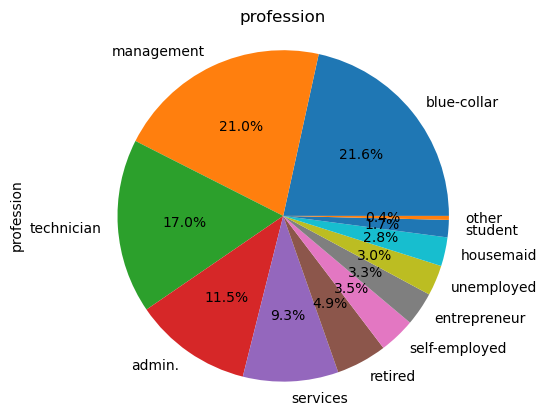

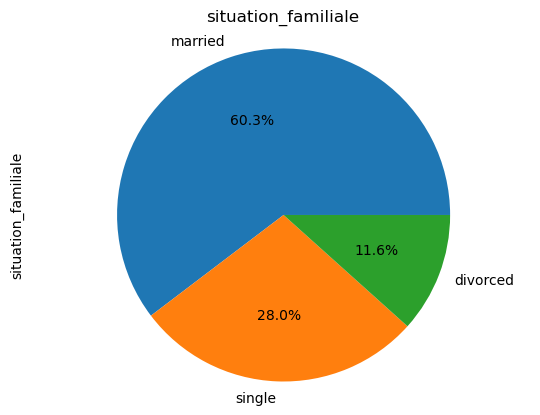

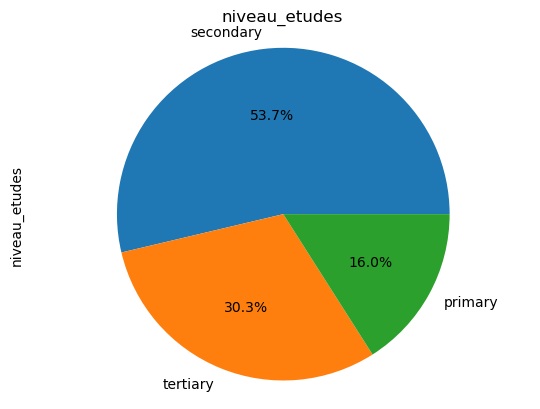

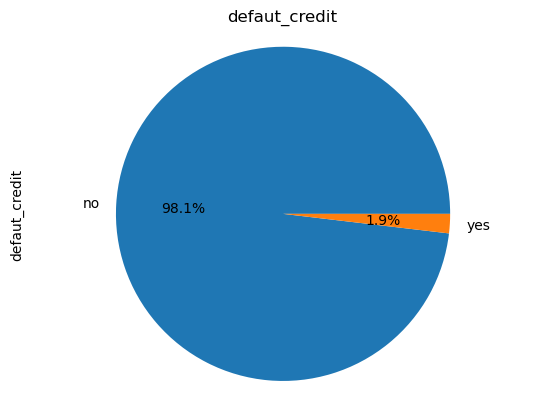

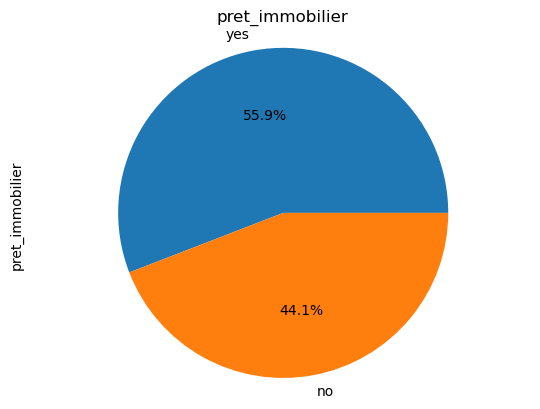

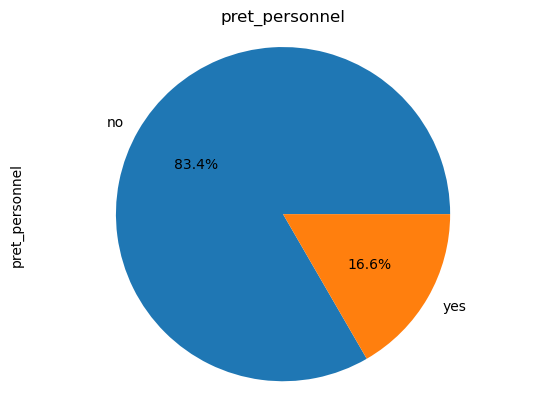

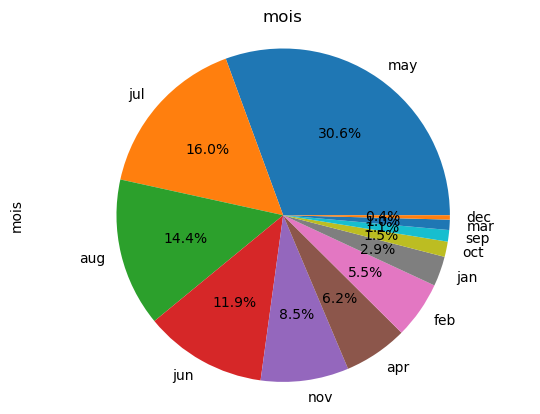

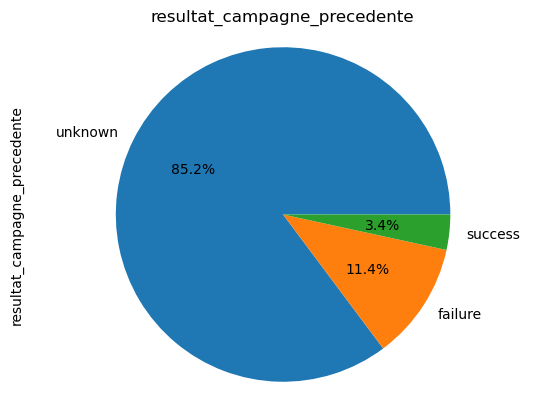

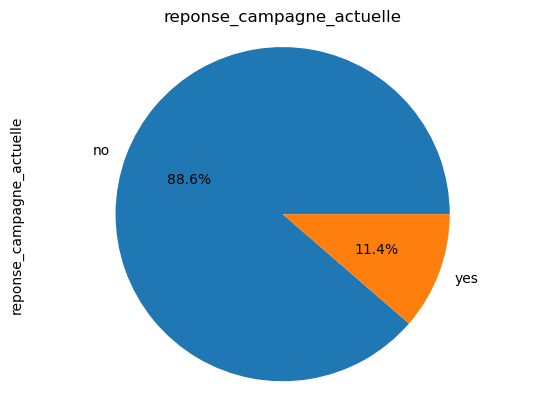

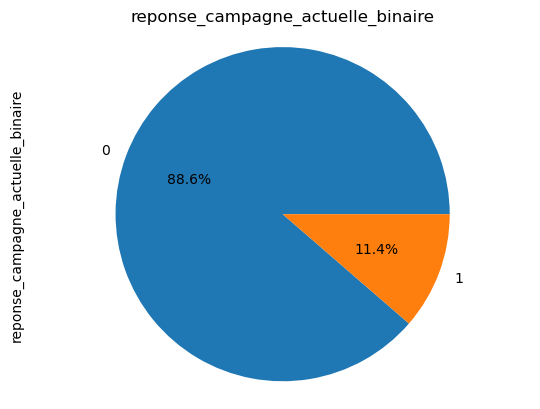

In [9]:


# Sélectionner les variables catégorielles
cat_vars = ['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier', 'pret_personnel',
             'mois', 'resultat_campagne_precedente', 'reponse_campagne_actuelle', 'reponse_campagne_actuelle_binaire']


# Générer un pie plot pour chaque variable catégorielle
for var in cat_vars:
    bankdata[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()


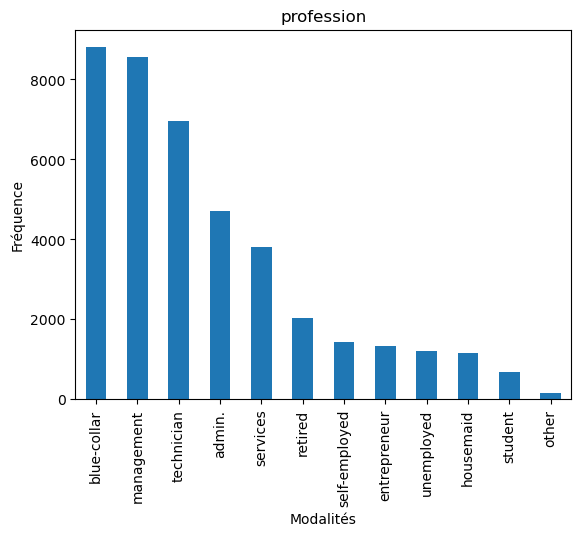

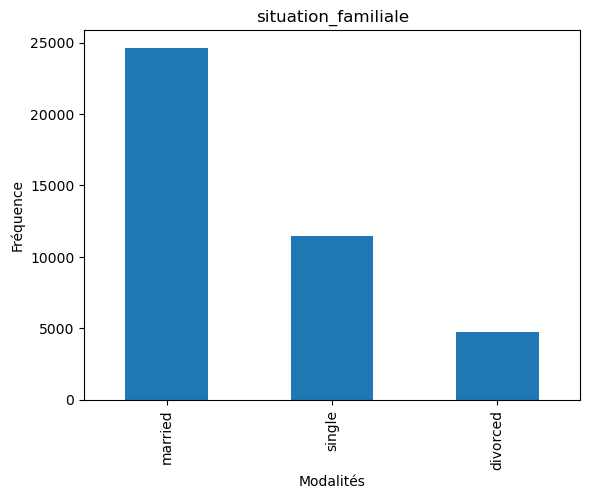

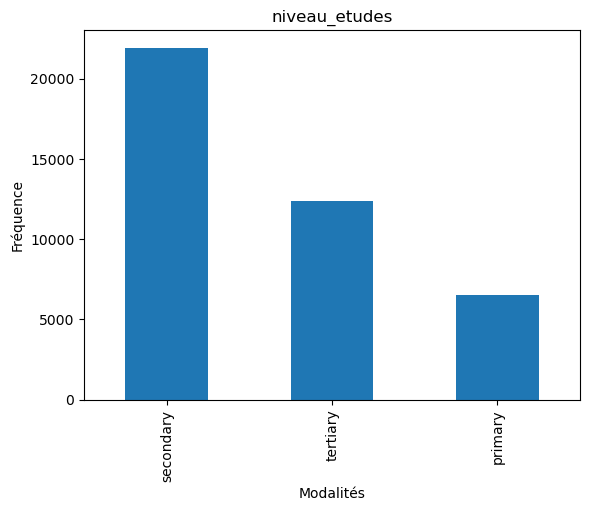

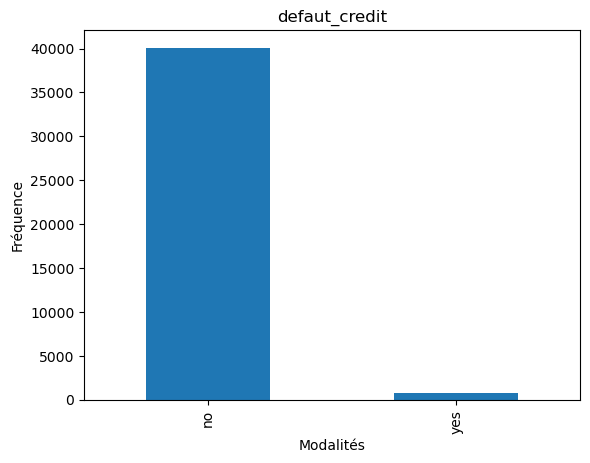

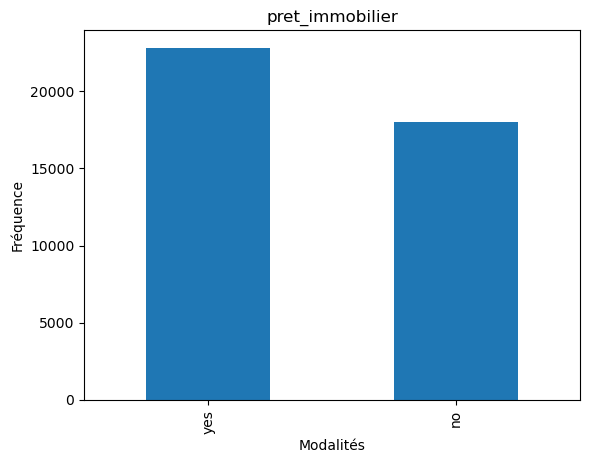

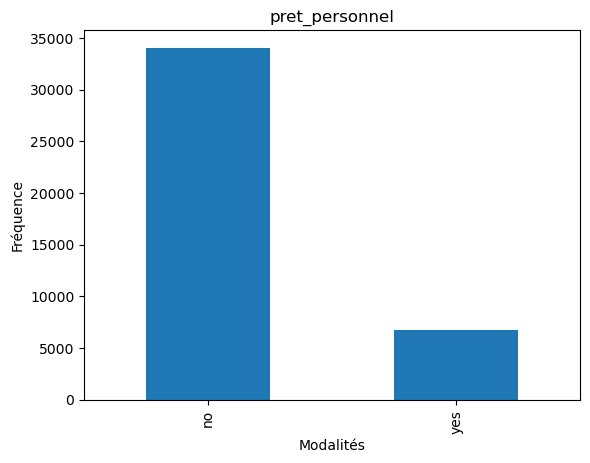

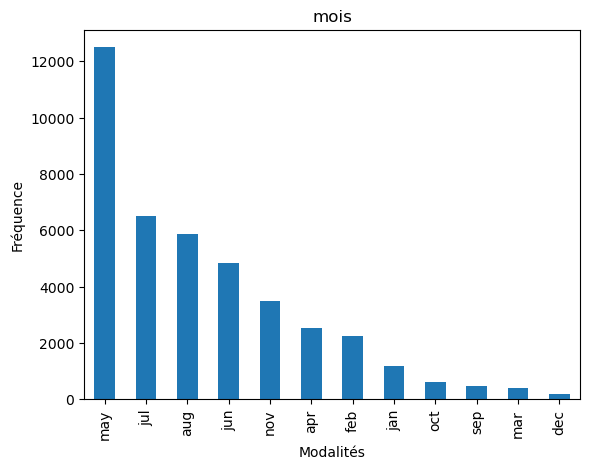

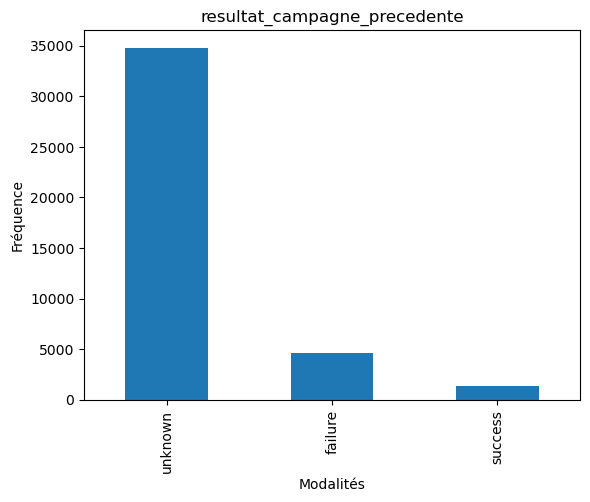

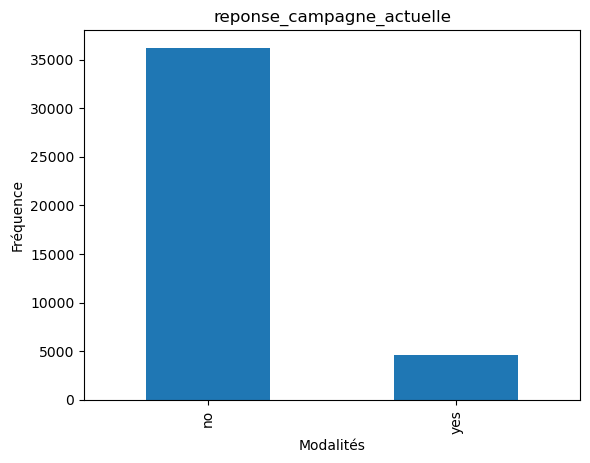

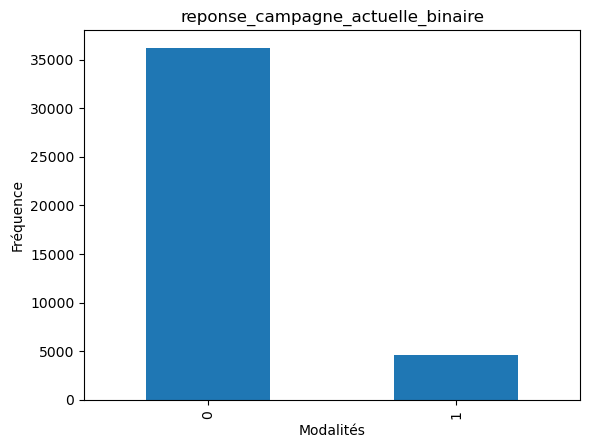

In [10]:

# Générer un bar plot pour chaque variable catégorielle
for var in cat_vars:
    bankdata[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Fréquence')
    plt.show()

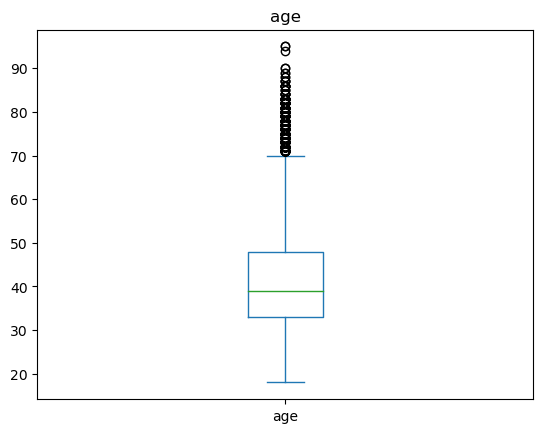

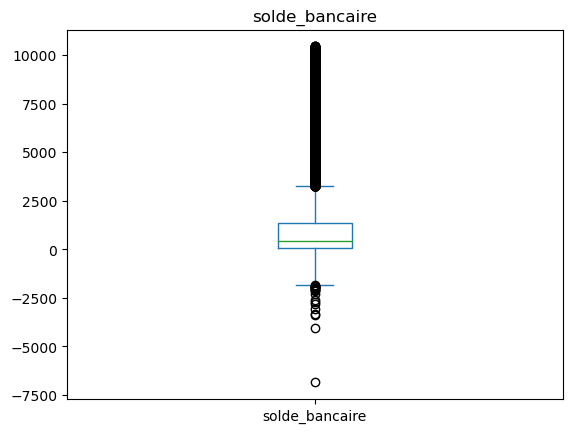

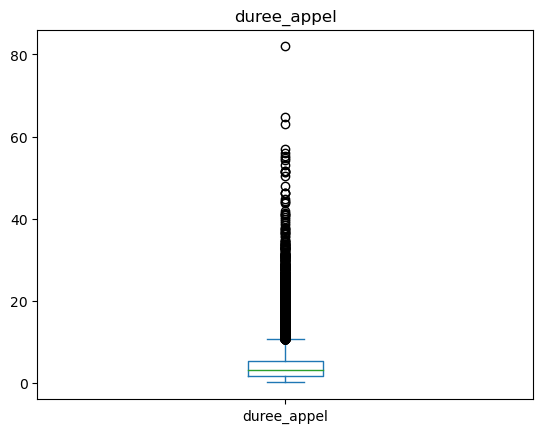

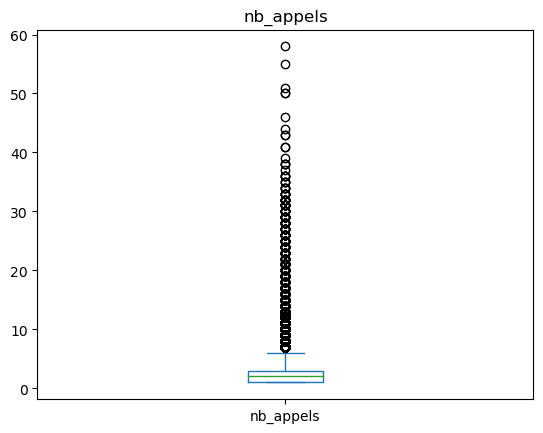

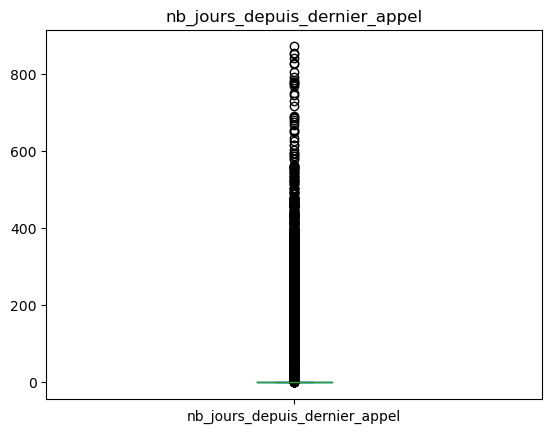

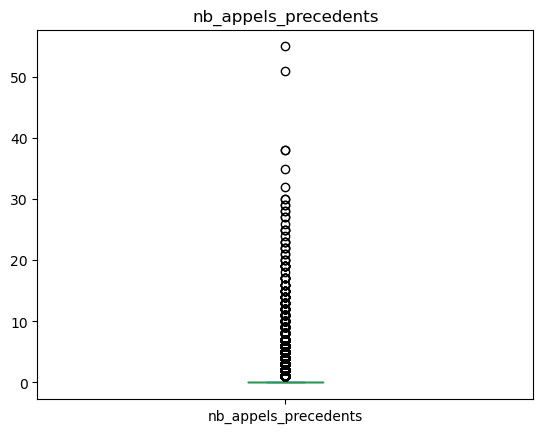

In [11]:


# Sélectionner les variables numériques
num_vars = ['age', 'solde_bancaire', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel', 'nb_appels_precedents']

# Générer un box plot pour chaque variable numérique
for var in num_vars:
    bankdata[var].plot(kind='box')
    plt.title(var)
    plt.show()

# Analyses bivariée

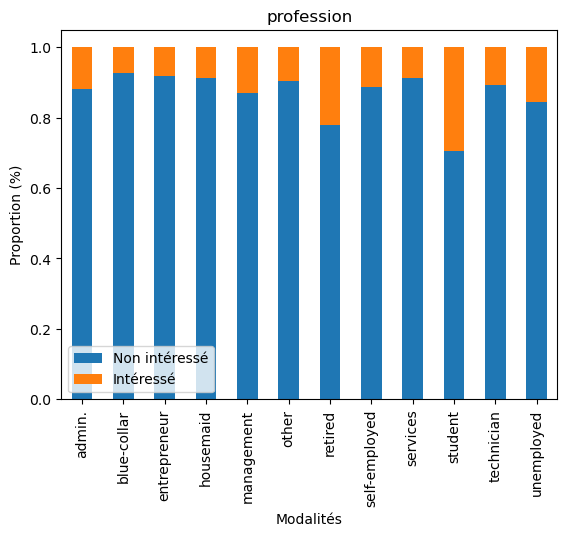

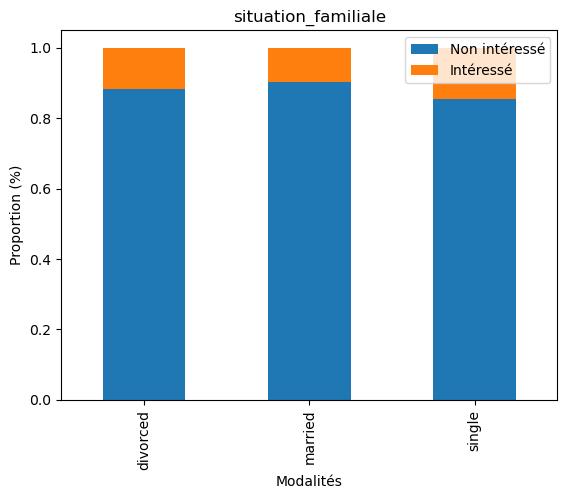

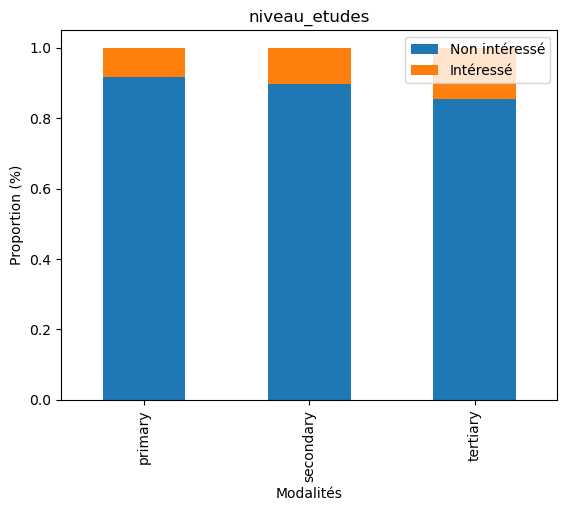

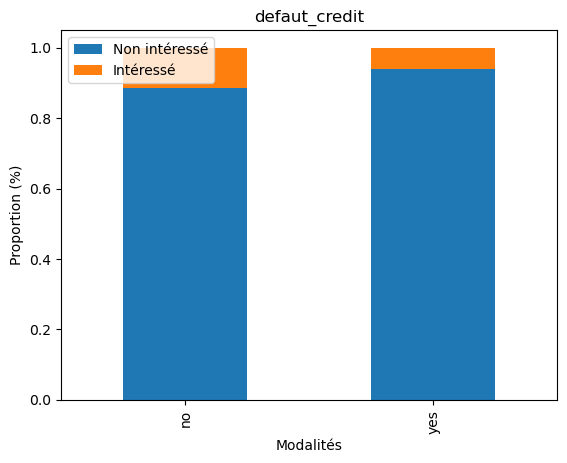

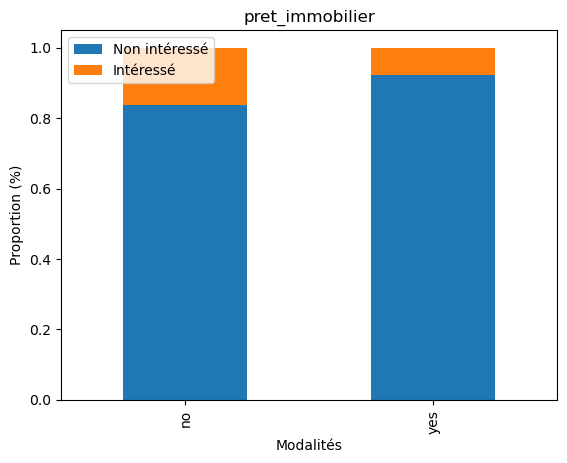

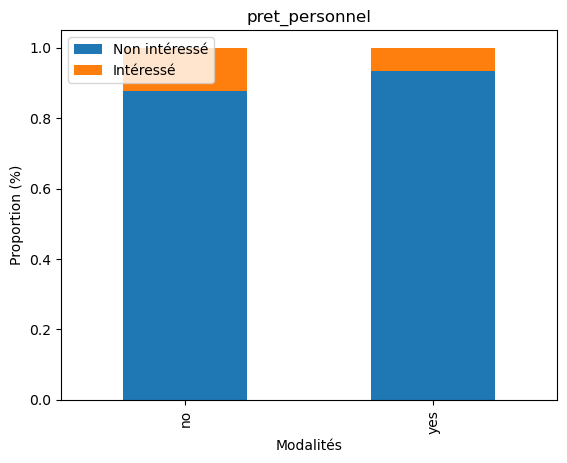

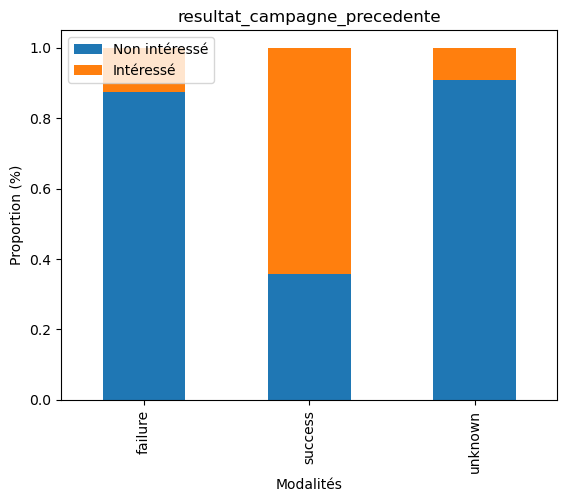

In [12]:
import seaborn as sns
# Sélectionner les variables catégorielles
# Sélectionner les variables catégorielles
cat_vars = ['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier', 'pret_personnel', 'resultat_campagne_precedente']


# Générer un count plot pour chaque variable catégorielle
# Définir la taille des figures




# Générer un bar plot pour chaque variable catégorielle
for var in cat_vars:
    figsize = (20, 20)
    (bankdata.groupby([var, 'reponse_campagne_actuelle_binaire'])['reponse_campagne_actuelle_binaire'].count()/bankdata.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Proportion (%)')
    plt.legend(['Non intéressé', 'Intéressé'])
    plt.show()

In [13]:

from scipy.stats import chi2_contingency
# Sélectionner les variables catégorielles
cat_vars = ['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier', 'pret_personnel', 'resultat_campagne_precedente']

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

# Parcourir toutes les variables catégorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(bankdata['reponse_campagne_actuelle_binaire'], bankdata[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

                       Variable         Chi2       P-valeur  V de Cramer
6  resultat_campagne_precedente  4072.108164   0.000000e+00     0.315689
4               pret_immobilier   720.301364  1.151140e-158     0.132713
0                    profession   708.668621  7.474840e-145     0.130702
2                 niveau_etudes   210.723005   1.746147e-46     0.071489
1           situation_familiale   181.858771   3.234965e-40     0.066363
5                pret_personnel   176.976953   2.215667e-40     0.065642
3                 defaut_credit    21.401052   3.725668e-06     0.022350


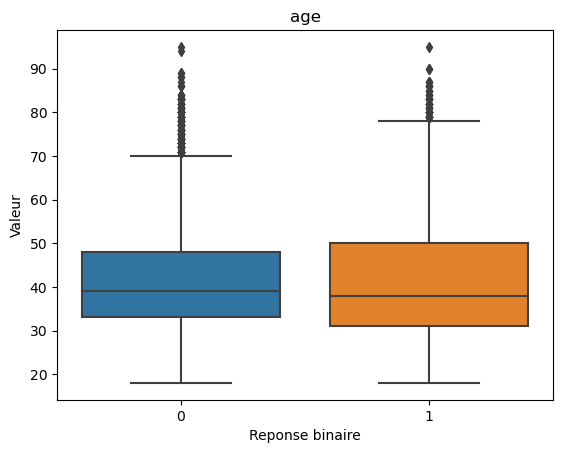

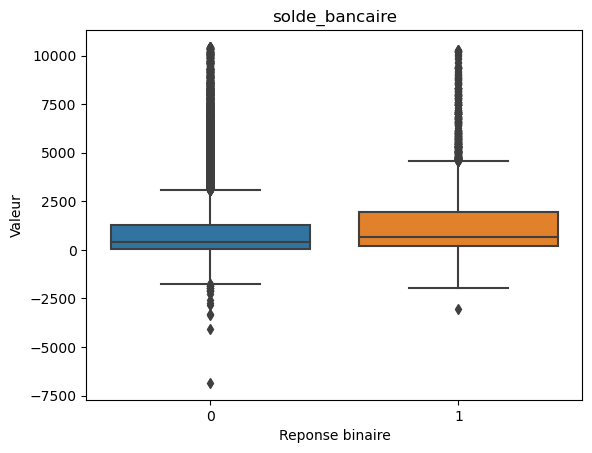

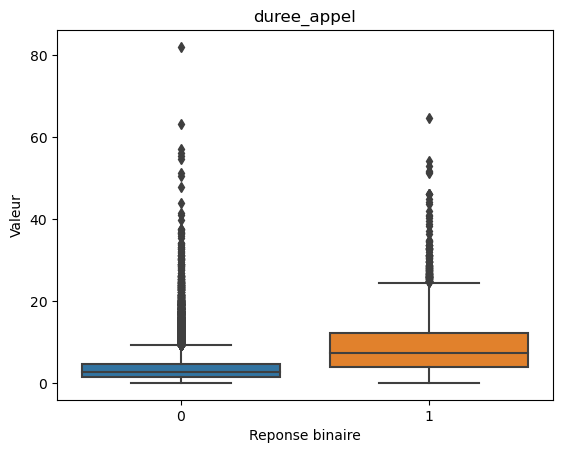

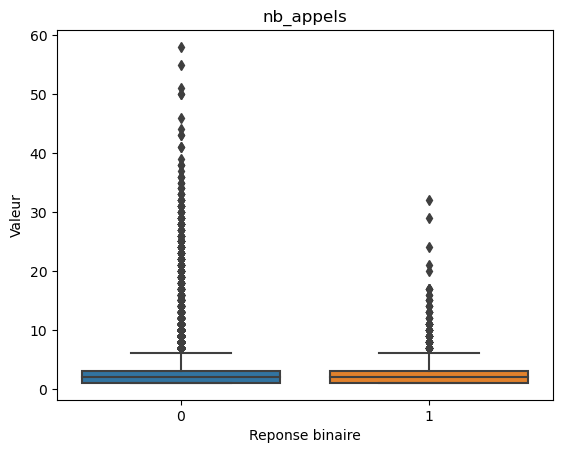

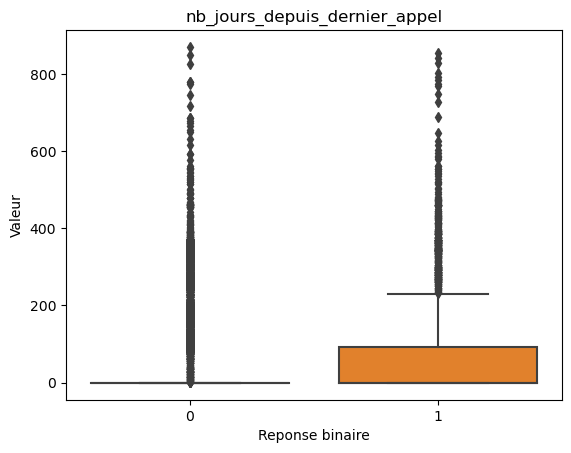

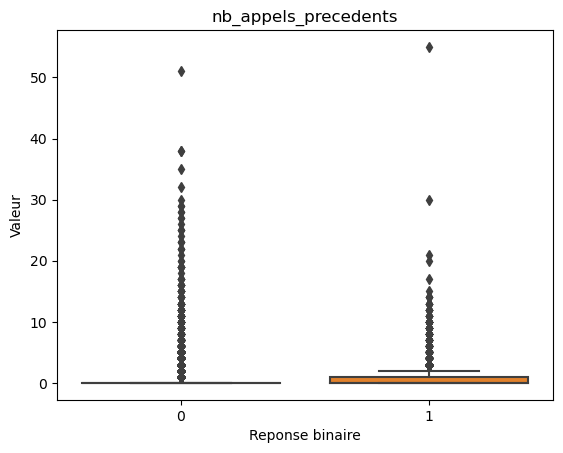

In [14]:
# Sélectionner les variables numériques

# Sélectionner les variables numériques
num_vars = ['age', 'solde_bancaire', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel', 'nb_appels_precedents']


# Générer un box plot pour chaque variable numérique
for var in num_vars:
    sns.boxplot(x='reponse_campagne_actuelle_binaire', y=var, data=bankdata)
    plt.title(var)
    plt.xlabel('Reponse binaire')
    plt.ylabel('Valeur')
    plt.show()

In [15]:
import scipy.stats as stats
# Initialiser les listes pour stocker les résultats
var_names = []
kw_stats = []
p_values = []

# Parcourir toutes les variables numériques
for var in num_vars:
    # Calculer les groupes de valeurs
    groups = [bankdata[bankdata['reponse_campagne_actuelle_binaire'] == 0][var], bankdata[bankdata['reponse_campagne_actuelle_binaire'] == 1][var]]
    # Appliquer le test de Kruskal-Wallis
    kw_stat, p = stats.kruskal(*groups)
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values
})

# Trier le DataFrame par ordre croissant de p-valeur
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher le tableau des résultats
print(results_df)

                        Variable  Kruskal-Wallis       P-valeur
2                    duree_appel     4767.047442   0.000000e+00
5           nb_appels_precedents     1241.504630  5.825212e-272
4  nb_jours_depuis_dernier_appel     1060.285642  1.414875e-232
1                 solde_bancaire      367.404987   6.874073e-82
3                      nb_appels      290.919176   3.135286e-65
0                            age        4.517712   3.354567e-02


# Modélisation

In [16]:
import statsmodels.api as sm
# Sélectionner les variables explicatives et la variable d'intérêt
X = bankdata[['age', 'profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'solde_bancaire', 
              'pret_immobilier', 'pret_personnel', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel',
              'nb_appels_precedents', 'resultat_campagne_precedente']]
y = bankdata['reponse_campagne_actuelle_binaire']

In [17]:
# Convertir les variables catégorielles en variables indicatrices (dummies)
X = pd.get_dummies(X, columns=['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier',
                               'pret_personnel',  'resultat_campagne_precedente'], drop_first=True)


In [18]:
# Ajouter une constante pour l'interception
X = sm.add_constant(X)

In [19]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Créer le modèle de régression logistique
logit_model = sm.Logit(y_train, X_train)


In [21]:
# Ajuster le modèle aux données d'apprentissage
result = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.245375
         Iterations 8


In [22]:
# Afficher le résumé des résultats de la régression
print(result.summary())

                                   Logit Regression Results                                  
Dep. Variable:     reponse_campagne_actuelle_binaire   No. Observations:                32672
Model:                                         Logit   Df Residuals:                    32645
Method:                                          MLE   Df Model:                           26
Date:                               Sat, 29 Apr 2023   Pseudo R-squ.:                  0.2973
Time:                                       23:25:12   Log-Likelihood:                -8016.9
converged:                                      True   LL-Null:                       -11409.
Covariance Type:                           nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 

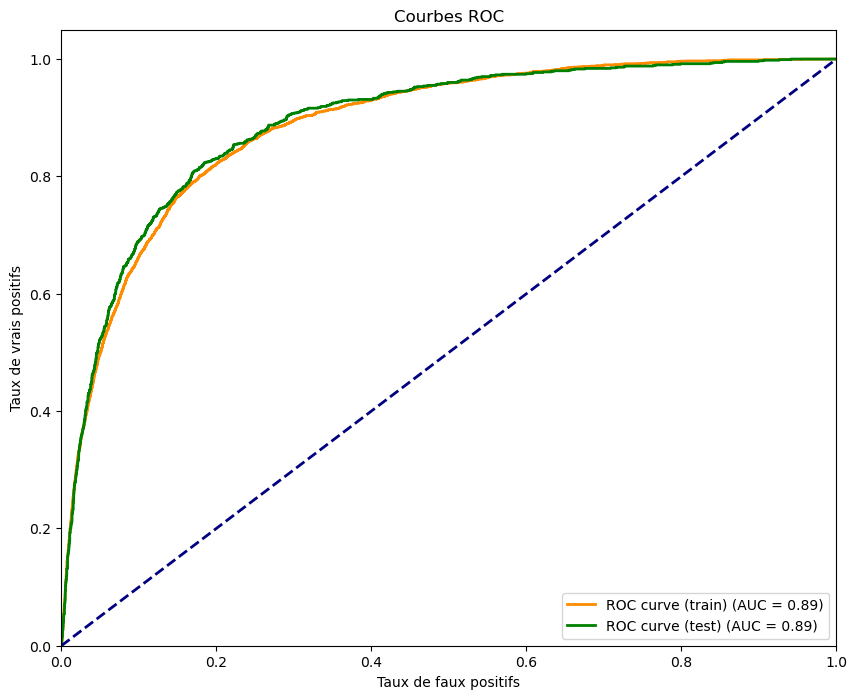

In [23]:
from sklearn.metrics import roc_curve, auc
# Obtenir les prédictions du modèle sur l'ensemble d'entraînement et de test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc="lower right")
plt.show()

In [24]:
from sklearn.metrics import classification_report

# Prédire les classes sur la base de test
y_pred = result.predict(X_test) > 0.5

# Générer le rapport de classification
report = classification_report(y_test, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7166
           1       0.67      0.32      0.43      1003

    accuracy                           0.90      8169
   macro avg       0.79      0.65      0.69      8169
weighted avg       0.88      0.90      0.88      8169



In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7013  153]
 [ 686  317]]


In [26]:
from sklearn.metrics import classification_report

# Prédire les classes sur la base de test
y_pred = result.predict(X_train) > 0.5

# Générer le rapport de classification
report = classification_report(y_train, y_pred)

# Afficher le rapport de classification
print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29036
           1       0.66      0.32      0.43      3636

    accuracy                           0.91     32672
   macro avg       0.79      0.65      0.69     32672
weighted avg       0.89      0.91      0.89     32672



In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred)
print(confusion_matrix)

[[28425   611]
 [ 2473  1163]]


In [ ]:
2*0.89-1